In [2]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import optimizers
from datetime import datetime

In [3]:
Npontos = 60 #Tempo de dados 60
features = 6
date = datetime.now()

In [4]:
dataset = pd.read_csv('completo.csv')

In [5]:
parc_data_train = 0.8
andando = dataset.loc[dataset['atividade'] == 0]
split = int(len(andando)*parc_data_train)
train_andando = andando[:split]
teste_andando = andando[split:]


In [6]:
sentado = dataset.loc[dataset['atividade'] == 3]
split = int(len(sentado)*parc_data_train)
train_sentado = sentado[:split]
teste_sentado = sentado[split:]


In [7]:
escreve = dataset.loc[dataset['atividade'] == 15]
split = int(len(escreve)*parc_data_train)
train_escreve = escreve[:split]
teste_escreve = escreve[split:]

In [8]:
escada = dataset.loc[dataset['atividade'] == 2]
split = int(len(escada)*parc_data_train)
train_escada = escada[:split]
teste_escada = escada[split:]
treino = pd.concat([train_andando, train_sentado, train_escreve, train_escada])
teste = pd.concat([teste_andando, teste_sentado, teste_escreve, teste_escada])
treino = treino.replace({2: 1, 3: 2, 15:3})
teste = teste.replace({2: 1, 3: 2, 15:3})

In [9]:
label_teste = teste['atividade']
label_teste = label_teste.values
teste = teste[['acelerômetro_x', 'acelerômetro_Y', 'acelerômetro_Z', 'giroscópio_x', 'giroscópio_Y', 'giroscópio_Z']].values

In [10]:
teste.shape

(150957, 6)

In [11]:
label = treino['atividade']
treino = treino[['acelerômetro_x', 'acelerômetro_Y', 'acelerômetro_Z', 'giroscópio_x', 'giroscópio_Y', 'giroscópio_Z']].values
label = label.values

In [12]:
def cria_IN_OUT(data, janela, features):
    OUT_indices = np.arange(janela, len(data), janela)
    OUT = data[OUT_indices]
    IN = data[range(janela*len(OUT))]
    IN = np.reshape(IN, (len(OUT), janela, features))
    IN_final = IN[:,:,:]
    return IN_final
trainX = cria_IN_OUT(treino, Npontos, 6)
trainY = cria_IN_OUT(label, Npontos, 1)
testX = cria_IN_OUT(teste, Npontos, 6)
testY = cria_IN_OUT(label_teste, Npontos, 1)
print(trainX.shape)

(10063, 60, 6)


In [13]:
testY = testY.astype(int)
testY.dtype
trainY = trainY.astype(int)

In [13]:
#teste de Label
for i in range(0,10063,1):
    teste = False
    for x in range(0,60,1):
        if teste == False:
            teste = trainY[i][x][0]
        else:
            if teste != trainY[i][x][0]:
                print('errado')
print(trainX.shape)
print(trainY.shape)

errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
errado
(10063, 60, 6)
(10063, 60, 1)


In [1]:
# taxa de aprendizado padrão ADAM 0.001
optimizer = optimizers.Adam(clipvalue=1.0, learning_rate=0.0001)
print(trainX.shape)

NameError: name 'optimizers' is not defined

In [ ]:
for i in range(0, 257, 1):
    teste = False
    for x in range(0, 58, 1):
        if teste == False:
            teste = trainY[i][x]
        else:
            if teste == trainY[i][x]:
                print('Errado, posição %.0f e %.0f' % (i,x))
trainY[140]

In [16]:
def cria_LSTM(hidden_units, dense_units, input_shape, activation, optimizer):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(hidden_units, input_shape=input_shape,activation=activation[0], return_sequences=True))
  model.add(tf.keras.layers.Dense(units=64, activation=activation[0]))
  model.add(tf.keras.layers.Dropout(rate=0.3))
  model.add(tf.keras.layers.Dense(units=32, activation=activation[0]))
  model.add(tf.keras.layers.Dense(units=dense_units, activation=activation[1]))
  model.compile(loss='sparse_categorical_crossentropy', optimizer =optimizer, metrics=['accuracy'])
  return model

def reset_model():
  global model
  model = cria_LSTM(hidden_units=120, dense_units=4, input_shape=(Npontos, features), activation=['relu', 'softmax'], optimizer=tf.keras.optimizers.Adam())

model = cria_LSTM(hidden_units=120, dense_units=4, input_shape=(Npontos, features), activation=['relu', 'softmax'], optimizer=optimizer)

In [17]:
reset_model()
print('Rodada %d' % i)
history = model.fit(trainX, trainY, epochs = 30, batch_size = 50, verbose = 1,  validation_data=(testX, testY))


Rodada 256
Epoch 1/30
202/202 [==============================] - 9s 37ms/step - loss: 0.6620 - accuracy: 0.7131 - val_loss: 0.6623 - val_accuracy: 0.7420
Epoch 2/30
202/202 [==============================] - 8s 40ms/step - loss: 0.4875 - accuracy: 0.7997 - val_loss: 0.6519 - val_accuracy: 0.7619
Epoch 3/30
202/202 [==============================] - 8s 40ms/step - loss: 0.4199 - accuracy: 0.8326 - val_loss: 0.5866 - val_accuracy: 0.7858
Epoch 4/30
202/202 [==============================] - 8s 40ms/step - loss: 0.3773 - accuracy: 0.8501 - val_loss: 0.5483 - val_accuracy: 0.7907
Epoch 5/30
202/202 [==============================] - 8s 38ms/step - loss: 0.3449 - accuracy: 0.8636 - val_loss: 0.5864 - val_accuracy: 0.7803
Epoch 6/30
202/202 [==============================] - 8s 38ms/step - loss: 0.3156 - accuracy: 0.8760 - val_loss: 0.5885 - val_accuracy: 0.8023
Epoch 7/30
202/202 [==============================] - 8s 38ms/step - loss: 0.2954 - accuracy: 0.8825 - val_loss: 0.6195 - val_accur

In [18]:
# Armazenar pesos durante o treinamento
pesos = []

for epoch in range(30):
    if epoch == 27:
        layer_weights = [layer.get_weights()[0].flatten() for layer in model.layers if layer.get_weights()]
        pesos.append(np.concatenate(layer_weights))

layer_index = 0  # Índice da camada LSTM
peso28 = pesos[0]

print(f"Valores dos pesos da camada LSTM na época 28:\n")
for i, weight_value in enumerate(peso28):
    print(f'Peso {i + 1}: {weight_value}')

Valores dos pesos da camada LSTM na época 28:

Peso 1: -0.05559561774134636
Peso 2: 0.07026542723178864
Peso 3: 0.0655159205198288
Peso 4: -0.05141231790184975
Peso 5: -0.02645932137966156
Peso 6: -0.14117224514484406
Peso 7: -0.17613312602043152
Peso 8: 0.20480413734912872
Peso 9: -0.04191981628537178
Peso 10: 0.20458541810512543
Peso 11: -0.05263553932309151
Peso 12: 0.0632062777876854
Peso 13: -0.05330583453178406
Peso 14: -0.05341612175107002
Peso 15: 0.12982408702373505
Peso 16: -0.36654335260391235
Peso 17: -0.13101525604724884
Peso 18: 0.04104053974151611
Peso 19: 0.09398964047431946
Peso 20: -0.05296740308403969
Peso 21: 0.13702017068862915
Peso 22: 0.11041616648435593
Peso 23: -0.08786970376968384
Peso 24: -0.011973400600254536
Peso 25: -0.10681597143411636
Peso 26: -0.1408410519361496
Peso 27: 0.08566879481077194
Peso 28: -0.04054313525557518
Peso 29: 0.11660434305667877
Peso 30: 0.0868220180273056
Peso 31: 0.1042240709066391
Peso 32: 0.033713337033987045
Peso 33: 0.212493389

(6, 120)


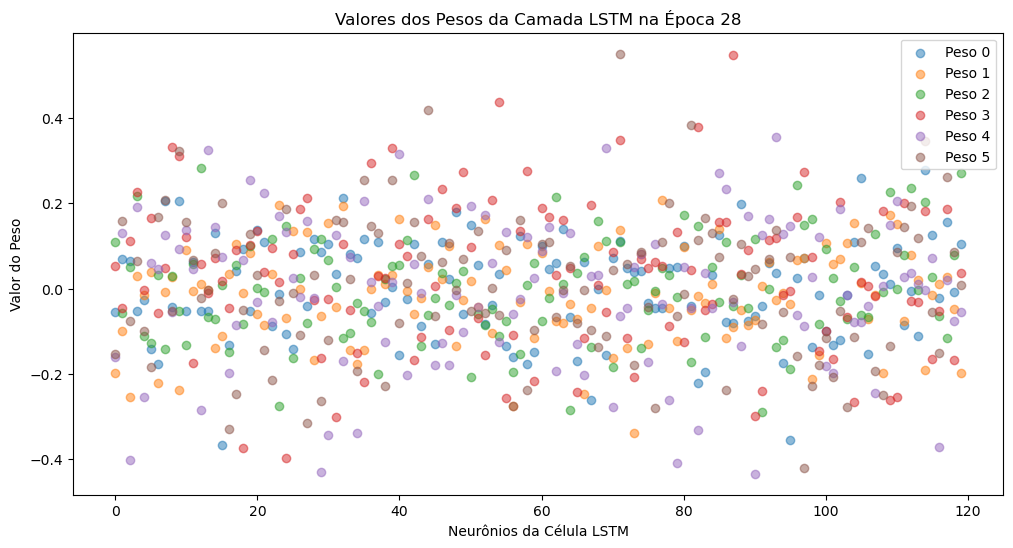

In [19]:
# Encontrar a camada LSTM (assumindo que é a primeira camada)
camada_lstm = model.layers[0]  # Substitua [0] pelo índice da sua camada LSTM se ela não for a primeira
pesos_lstm = camada_lstm.get_weights()

# Suponha que a camada LSTM tenha 120 células (unidades)
num_celulas = 120
pesos_celulas = pesos_lstm[0][:, :num_celulas]  # Seleciona os pesos associados às primeiras 120 células

# Plote os pesos usando um gráfico de pontos
plt.figure(figsize=(12, 6))
neuronios = range(num_celulas)

for i in range(pesos_celulas.shape[0]):  # Para cada peso individual
    plt.scatter(neuronios, pesos_celulas[i, :], label=f'Peso {i}', alpha=0.5)
print(pesos_celulas.shape)

# Adicione legendas aos eixos x e y
plt.xlabel('Neurônios da Célula LSTM')
plt.ylabel('Valor do Peso')
plt.title(f'Valores dos Pesos da Camada LSTM na Época {28}')
plt.legend()
plt.show()

C:\Users\rapha\AppData\Local\Temp\ipykernel_10356\4128045773.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


Text(0.5, 0, 'epoch')

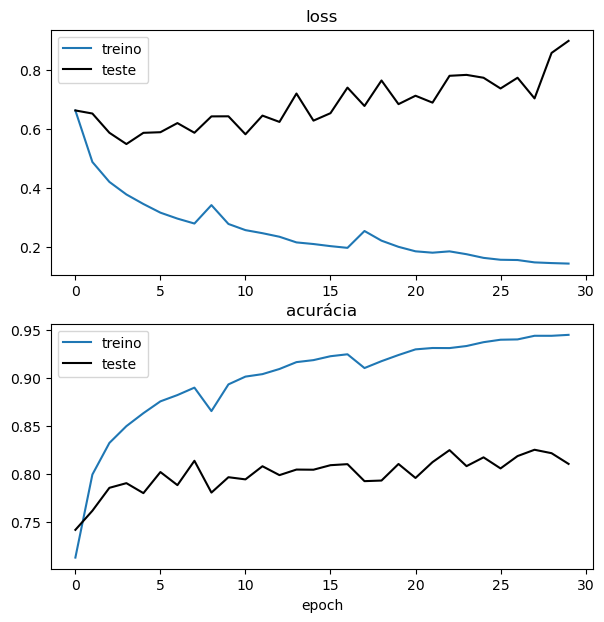

In [27]:
plt.figure(figsize= (7,7))
plt.title(f"Gráfico Treino e Teste {date}")
plt.subplot(2,1,1)
plt.title("loss")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'k')
plt.legend(['treino', 'teste'])

plt.subplot(2,1,2)
plt.title("acurácia")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'k')
plt.legend(['treino', 'teste'])
plt.xlabel('epoch')

NameError: name 'resultado' is not defined

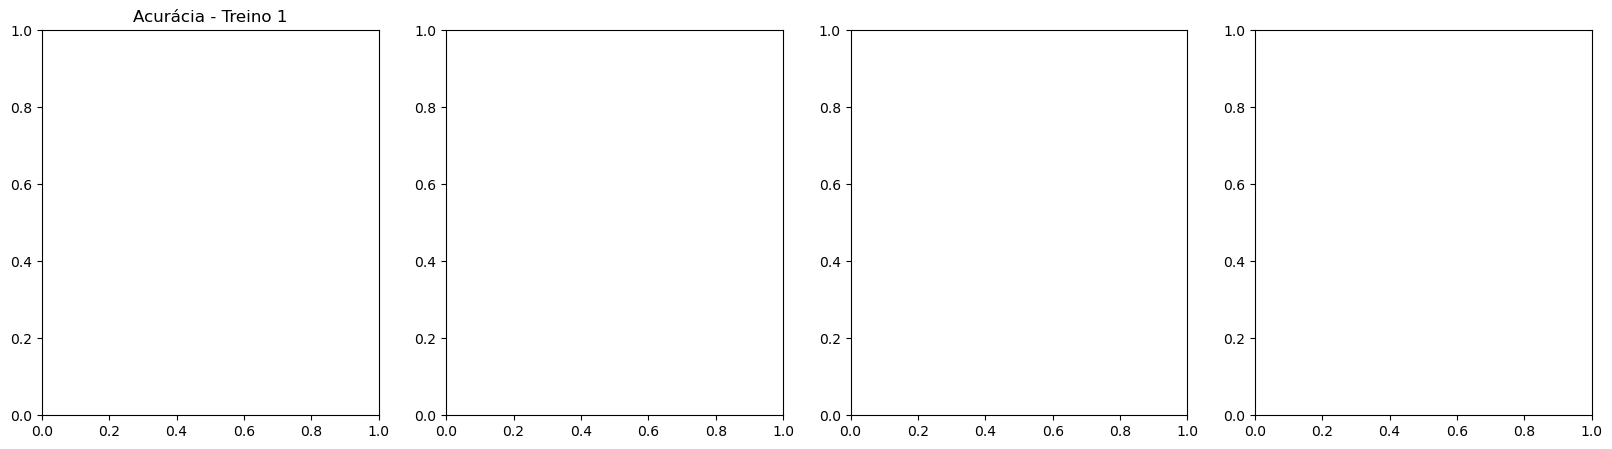

In [21]:
import matplotlib.pyplot as plt

# Criar subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
axes = axes.flatten()  # Transforma a matriz 2D em uma matriz 1D para facilitar a iteração

# Plotar a acurácia para cada iteração
for i in range(4):
    ax = axes[i]
    ax.set_title(f'Acurácia - Treino {i + 1}')
    ax.plot(resultado[i].history['accuracy'], label='Treino')
    ax.plot(resultado[i].history['val_accuracy'], label='Validação')
    ax.set_xlabel('Épocas')
    ax.set_ylabel('Acurácia')
    ax.set_ylim(0, 1)
    ax.legend()

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

In [ ]:
accuracy = model.evaluate(testX, testY)
print('Acurácia: %.2f%%' % (accuracy[1]*100))
print('Loss: %.2f' % (accuracy[0]))


79/79 [==============================] - 1s 8ms/step - loss: 1.3210 - accuracy: 0.3092
Acurácia: 30.92%
Loss: 1.32
